In [67]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scienceplots

plt.style.use(['science', 'no-latex'])

df = pd.read_csv('comparison_results_SVT.csv')
df.rename(columns={'time': 'T(s)'}, inplace=True)
df.rename(columns={'rmse': 'RMSE(%)'}, inplace=True)
df.rename(columns={'rank': 'k'}, inplace=True)
df.rename(columns={'p': 'p2'}, inplace=True)
df.rename(columns={'l': 'p'}, inplace=True)

In [68]:
for i in range(2, 10):
    df2 = pd.read_csv('comparison_results_SVT_experiment'+ str(i) + '.csv')
    df2.rename(columns={'time': 'T(s)'}, inplace=True)
    df2.rename(columns={'rmse': 'RMSE(%)'}, inplace=True)
    df2.rename(columns={'rank': 'k'}, inplace=True)
    df2.rename(columns={'p': 'p2'}, inplace=True)
    df2.rename(columns={'l': 'p'}, inplace=True)
    # merge the two dataframes with mean values
    df = pd.concat([df, df2])

In [69]:
df

,Unnamed: 0,method,k,p,p2,RMSE(%),T(s)
0,0,FRSVT,3,5,2,0.009983,0.539786
1,1,QISVT,3,5,2,0.009983,0.732700
2,2,SVT,3,5,2,0.010054,7.686761
3,3,FRSVT,3,5,2,0.009980,0.601716
4,4,QISVT,3,5,2,0.010005,0.244377
...,...,...,...,...,...,...,...
115,115,QISVT,11,20,2,0.012001,1.695467
116,116,SVT,11,20,2,0.012471,2.391761
117,117,FRSVT,11,20,2,0.012783,1.745369
118,118,QISVT,11,20,2,0.012684,1.679375


In [70]:
df = df.groupby(['p', 'k', 'method']).mean().reset_index()

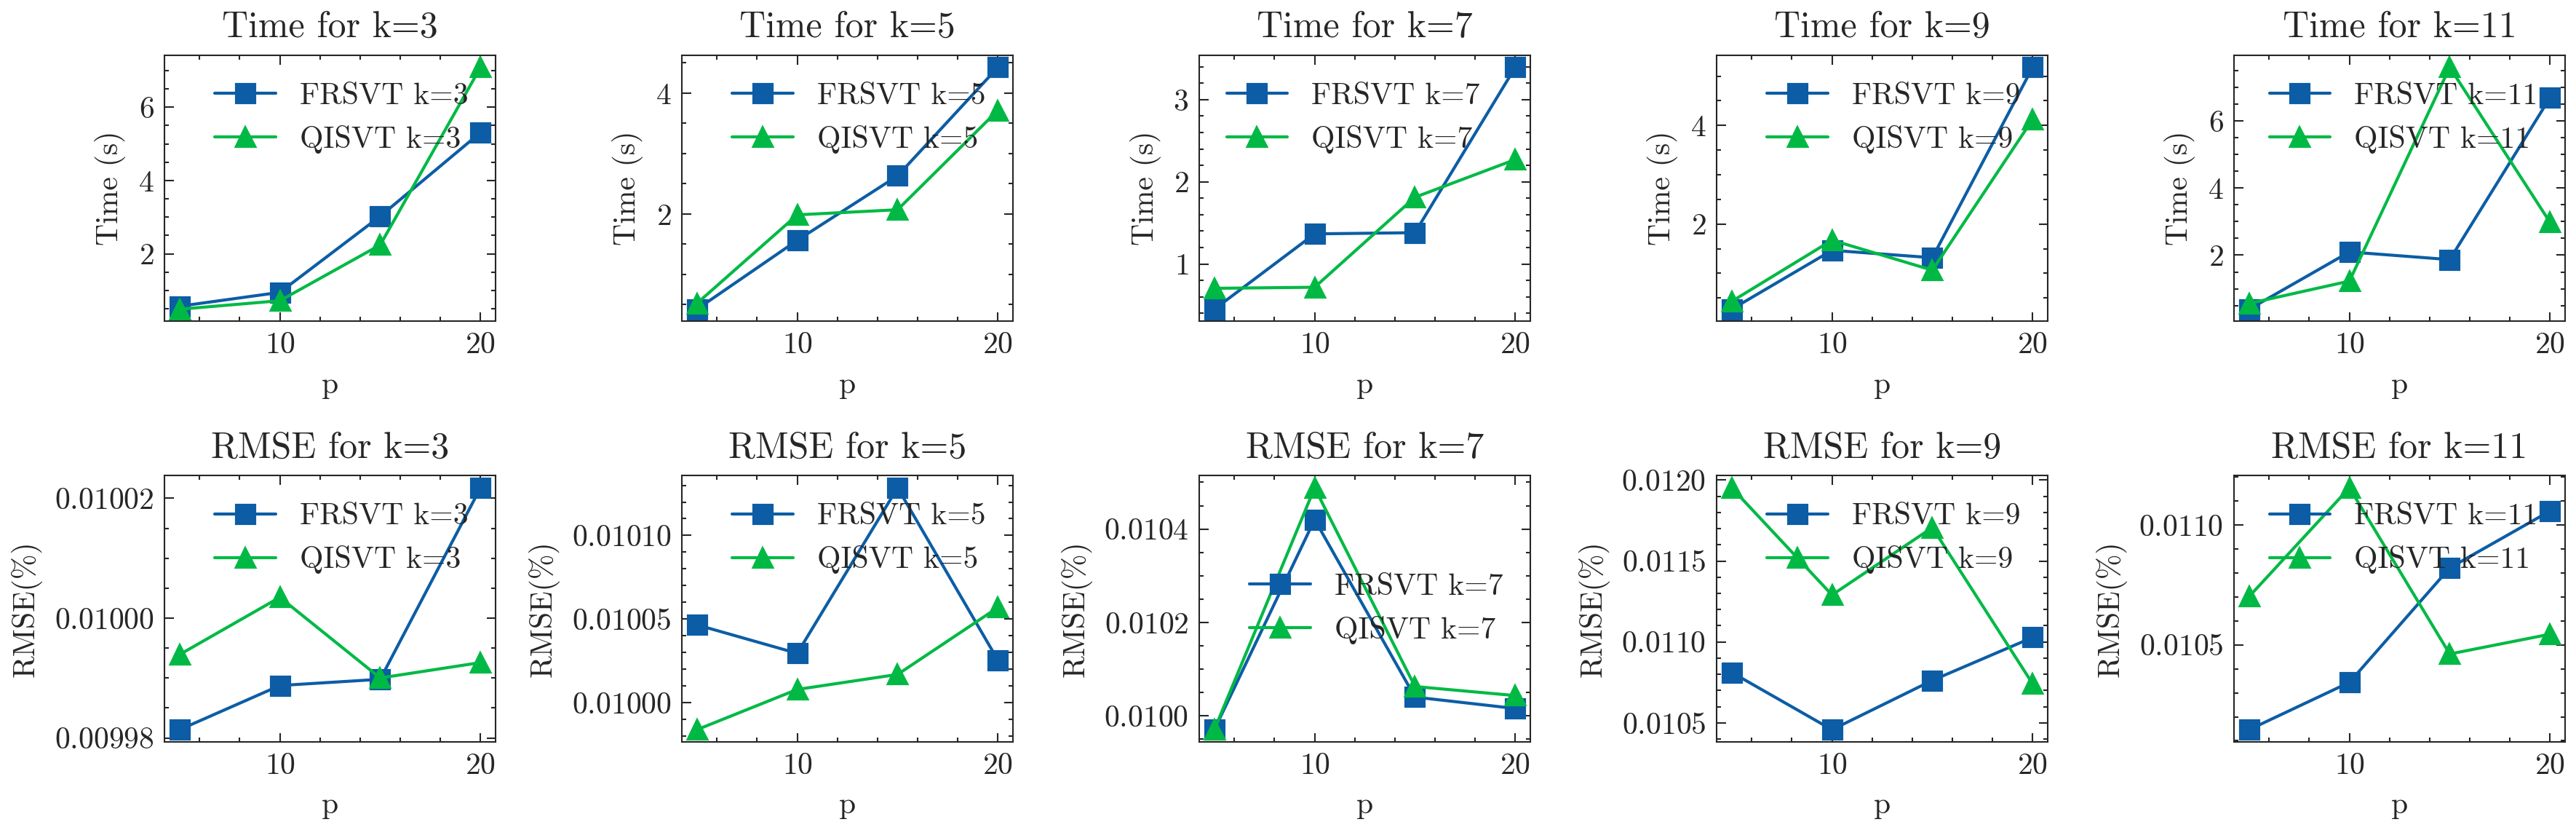

In [71]:
### replot for different k as subplots
fig, axes = plt.subplots(2, 5, figsize=(12, 4), dpi = 300)

# Plot for Time (T(s))
for k_value in time_df['k'].unique():
    subset = time_df[time_df['k'] == k_value]
    # axes[0, int((k_value - 2)/2)].plot(subset['p'], subset['SVT'], marker='o', label=f'SVT k={k_value}')
    axes[0, int((k_value - 2)/2)].plot(subset['p'], subset['FRSVT'], marker='s', label=f'FRSVT k={k_value}')
    axes[0, int((k_value - 2)/2)].plot(subset['p'], subset['QISVT'], marker='^', label=f'QISVT k={k_value}')
    
    axes[0, int((k_value - 2)/2)].set_xlabel('p')
    axes[0, int((k_value - 2)/2)].set_ylabel('Time (s)')
    axes[0, int((k_value - 2)/2)].set_title(f'Time for k={k_value}')
    axes[0, int((k_value - 2)/2)].legend()

# Plot for RMSE(%)
for k_value in rmse_df['k'].unique():
    subset = rmse_df[rmse_df['k'] == k_value]
    # axes[1, int((k_value - 2)/2)].plot(subset['p'], subset['SVT'], marker='o', label=f'SVT k={k_value}')
    axes[1, int((k_value - 2)/2)].plot(subset['p'], subset['FRSVT'], marker='s', label=f'FRSVT k={k_value}')
    axes[1, int((k_value - 2)/2)].plot(subset['p'], subset['QISVT'], marker='^', label=f'QISVT k={k_value}')

    axes[1, int((k_value - 2)/2)].set_xlabel('p')
    axes[1, int((k_value - 2)/2)].set_ylabel('RMSE(%)')
    axes[1, int((k_value - 2)/2)].set_title(f'RMSE for k={k_value}')
    axes[1, int((k_value - 2)/2)].legend()

# Show the plot
plt.tight_layout()
plt.show()

